In [1]:
using Plots
using LaTeXStrings
using LinearAlgebra
using Pkg
# Pkg.add("BasicBSpline") 
using BasicBSpline
using StaticArrays



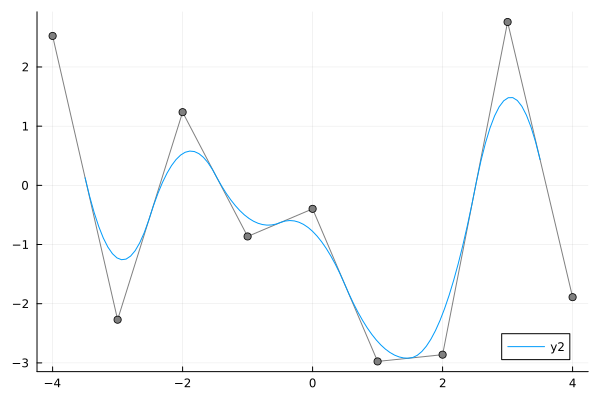

In [2]:
f(x, y) = (3x + y^2) * abs(sin(x) + cos(y))
x = range(0, 5, length=100)
y = range(0, 3, length=50)
z = @. f(x', y)


## 1-dim B-spline manifold
p = 2 # degree of polynomial
k = KnotVector(1:12) # knot vector
P = BSplineSpace{p}(k) # B-spline space
a = [SVector(i-5, 3*sin(i^2)) for i in 1:dim(P)] # control points
M = BSplineManifold(a, P) # Define B-spline manifold
gr(); plot(M)

In [3]:
import Pkg
# Pkg.add("PlotlyBase")
using PlotlyBase
# Define shape
plotly()
p = 2
k = KnotVector([-1,-1,-1,1,1,1])
k = KnotVector(range(1, 6, length=6)) 
P = BSplineSpace{p}(k)
a = [SVector(i,j,2i^2+2j^2-2) for i in -1:1, j in -1:1]
M = BSplineManifold(a,P,P)
# println(M(1,1))
plot(M)
# println(M(-1.1,1))

┌ Warning: Failed to load integration with PlotlyBase & PlotlyKaleido.
│   exception = (ArgumentError("Package PlotlyKaleido not found in current path.\n- Run `import Pkg; Pkg.add(\"PlotlyKaleido\")` to install the PlotlyKaleido package."), Union{Ptr{Nothing}, Base.InterpreterIP}[Ptr{Nothing} @0x00007f562cb3589a, Ptr{Nothing} @0x00007f562d4d2a52, Ptr{Nothing} @0x00007f564205f979, Ptr{Nothing} @0x00007f562c5df77b, Ptr{Nothing} @0x00007f562d71e3b2, Ptr{Nothing} @0x00007f564208cd63, Ptr{Nothing} @0x00007f564208ed75, Ptr{Nothing} @0x00007f5642071212, Ptr{Nothing} @0x00007f5642071b3d, Base.InterpreterIP in top-level CodeInfo for Main at statement 1, Ptr{Nothing} @0x00007f564208dfed, Ptr{Nothing} @0x00007f564208f9a5, Ptr{Nothing} @0x00007f560818975f, Ptr{Nothing} @0x00007f5608189f37, Ptr{Nothing} @0x00007f560818a063, Ptr{Nothing} @0x00007f560818a08f, Ptr{Nothing} @0x00007f5642070364, Ptr{Nothing} @0x00007f564206fe2c, Ptr{Nothing} @0x00007f5642070f97, Ptr{Nothing} @0x00007f5642071b3d, Base.In

In [4]:
plotly()
p = 2
# k = KnotVector([-3,-2,-1,1,2,3])
tests = [i for i in range(-3,3, 10)]
k = KnotVector(tests)
P = BSplineSpace{p}(k)
# k2 = KnotVector([-3,-1,-1,1,3,5])
# P2 = BSplineSpace{p}(k2)
println(length(k))
println(P)
println(dim(P))
# println(fieldnames(P))
xs = range(-3,3,length=dim(P))
println(xs)
ys = range(-3,3,length=dim(P))
# a = [SVector(i,j,2i^2+2j^2-2) for i in -1:1, j in -1:1]
a = [SVector(x,y,2x^2+2y^2) for x in xs, y in ys]
# println(typeof(a))
# println(size(a))
# println(a[1,1])
println(getindex.(a,1))

M = BSplineManifold(a,P,P)

# println(propertynames(M))
# println(M.controlpoints)
# println(M.bsplinespaces)
# # println(M)

10
BSplineSpace{2, Float64, KnotVector{Float64}}(KnotVector([-3.0, -2.3333333333333335, -1.6666666666666667, -1.0, -0.3333333333333333, 0.3333333333333333, 1.0, 1.6666666666666667, 2.3333333333333335, 3.0]))
7
-3.0:1.0:3.0
[-3.0 -3.0 -3.0 -3.0 -3.0 -3.0 -3.0; -2.0 -2.0 -2.0 -2.0 -2.0 -2.0 -2.0; -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 1.0 1.0 1.0 1.0 1.0 1.0 1.0; 2.0 2.0 2.0 2.0 2.0 2.0 2.0; 3.0 3.0 3.0 3.0 3.0 3.0 3.0]


BSplineManifold{2, (2, 2), SVector{3, Float64}, Float64, Tuple{BSplineSpace{2, Float64, KnotVector{Float64}}, BSplineSpace{2, Float64, KnotVector{Float64}}}}(SVector{3, Float64}[[-3.0, -3.0, 36.0] [-3.0, -2.0, 26.0] … [-3.0, 2.0, 26.0] [-3.0, 3.0, 36.0]; [-2.0, -3.0, 26.0] [-2.0, -2.0, 16.0] … [-2.0, 2.0, 16.0] [-2.0, 3.0, 26.0]; … ; [2.0, -3.0, 26.0] [2.0, -2.0, 16.0] … [2.0, 2.0, 16.0] [2.0, 3.0, 26.0]; [3.0, -3.0, 36.0] [3.0, -2.0, 26.0] … [3.0, 2.0, 26.0] [3.0, 3.0, 36.0]], (BSplineSpace{2, Float64, KnotVector{Float64}}(KnotVector([-3.0, -2.3333333333333335, -1.6666666666666667, -1.0, -0.3333333333333333, 0.3333333333333333, 1.0, 1.6666666666666667, 2.3333333333333335, 3.0])), BSplineSpace{2, Float64, KnotVector{Float64}}(KnotVector([-3.0, -2.3333333333333335, -1.6666666666666667, -1.0, -0.3333333333333333, 0.3333333333333333, 1.0, 1.6666666666666667, 2.3333333333333335, 3.0]))))

In [5]:
M(tests[3], tests[4])

3-element SVector{3, Float64} with indices SOneTo(3):
 -2.5
 -1.5
 18.0

In [6]:
using BenchmarkTools
@benchmark BSplineManifold(a,P,P)

BenchmarkTools.Trial: 10000 samples with 425 evaluations per sample.
 Range (min … max):  235.395 ns …  28.005 μs  ┊ GC (min … max): 0.00% … 98.28%
 Time  (median):     257.866 ns               ┊ GC (median):    0.00%
 Time  (mean ± σ):   266.894 ns ± 279.490 ns  ┊ GC (mean ± σ):  1.03% ±  0.98%

      █▄ ▁▅▄▁                                                    
  ▃▅▃▆██▅████▇▅▄▃▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▂
  235 ns           Histogram: frequency by time          399 ns <

 Memory estimate: 32 bytes, allocs estimate: 1.

In [7]:
x_support = -3:3
y_support = x_support
Δx = abs(x_support[2] - x_support[1])
p = 4 # degree of polynomial
order = p + 1
temp_x = range(x_support[1]-p*Δx, x_support[end]+p*Δx, length=length(x_support)+2*p)

k = KnotVector(temp_x)
P = BSplineSpace{p}(k)
println(length(x_support))
println(length(k))
println(dim(P))
temp_x2 = range(temp_x[2], temp_x[end-1], length=dim(P))

a = [[x,y,2*x] for x in temp_x2, y in temp_x2]

M = BSplineManifold(a,P,P)

# plot(M; aspectratio=1)

7
15
10


BSplineManifold{2, (4, 4), Vector{Float64}, Float64, Tuple{BSplineSpace{4, Float64, KnotVector{Float64}}, BSplineSpace{4, Float64, KnotVector{Float64}}}}([[-6.0, -6.0, -12.0] [-6.0, -4.666666666666667, -12.0] … [-6.0, 4.666666666666667, -12.0] [-6.0, 6.0, -12.0]; [-4.666666666666667, -6.0, -9.333333333333334] [-4.666666666666667, -4.666666666666667, -9.333333333333334] … [-4.666666666666667, 4.666666666666667, -9.333333333333334] [-4.666666666666667, 6.0, -9.333333333333334]; … ; [4.666666666666667, -6.0, 9.333333333333334] [4.666666666666667, -4.666666666666667, 9.333333333333334] … [4.666666666666667, 4.666666666666667, 9.333333333333334] [4.666666666666667, 6.0, 9.333333333333334]; [6.0, -6.0, 12.0] [6.0, -4.666666666666667, 12.0] … [6.0, 4.666666666666667, 12.0] [6.0, 6.0, 12.0]], (BSplineSpace{4, Float64, KnotVector{Float64}}(KnotVector([-7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])), BSplineSpace{4, Float64, KnotVector{Float64}}(KnotVector([-7

In [8]:
println(k)
println(temp_x)
println(M(3,3)[3])
println(3^2)
println(sqrt(M(3,3)[3]))

getindex.(M.(xs', ys),3)
# M(-4,3)

KnotVector([-7.0, -6.0, -5.0, -4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
-7.0:1.0:7.0
7.999999999999999
9
2.82842712474619


7×7 Matrix{Float64}:
 -8.0  -5.33333  -2.66667  -1.04083e-17  2.66667  5.33333  8.0
 -8.0  -5.33333  -2.66667  -1.04083e-17  2.66667  5.33333  8.0
 -8.0  -5.33333  -2.66667  -1.04083e-17  2.66667  5.33333  8.0
 -8.0  -5.33333  -2.66667  -1.04083e-17  2.66667  5.33333  8.0
 -8.0  -5.33333  -2.66667  -1.04083e-17  2.66667  5.33333  8.0
 -8.0  -5.33333  -2.66667  -1.04083e-17  2.66667  5.33333  8.0
 -8.0  -5.33333  -2.66667  -1.04083e-17  2.66667  5.33333  8.0

In [9]:
using Turing
using Distributions

In [10]:
xs = collect(-2:0.1:2)
ys = collect(-2:0.1:2)
surface_data = @. xs'^2 + ys^2 + sin(xs' * 2ys)
plot(xs, ys, surface_data; st=:surface, xlabel="x", ylabel="y", zlabel="z", title="Surface Plot")

In [11]:
x_support = xs
y_support = x_support
Δx = abs(x_support[2] - x_support[1])
p = 4 # degree of polynomial
order = p + 1
temp_x = range(x_support[1]-p*Δx, x_support[end]+p*Δx, length=length(x_support)+2*p)

k = KnotVector(temp_x)
P = BSplineSpace{p}(k)
temp_x2 = range(temp_x[2], temp_x[end-1], length=dim(P))
println(length(x_support))

41


In [12]:
methods(filldist)

# 5 methods for generic function "filldist" from DistributionsAD:
 [1] filldist(dist::MultivariateDistribution, N::Int64)
     @ ~/.julia/packages/DistributionsAD/GAQrK/src/filldist.jl:111
 [2] filldist(dist::UnivariateDistribution, N1::Int64, N2::Int64)
     @ ~/.julia/packages/DistributionsAD/GAQrK/src/filldist.jl:92
 [3] filldist(d::Normal, N::Int64)
     @ ~/.julia/packages/DistributionsAD/GAQrK/src/filldist.jl:42
 [4] filldist(dist::UnivariateDistribution, N::Int64)
     @ ~/.julia/packages/DistributionsAD/GAQrK/src/filldist.jl:39
 [5] filldist(d::Distribution, n1::Int64, ns::Int64...)
     @ ~/.julia/packages/DistributionsAD/GAQrK/src/filldist.jl:28

In [13]:
using ReverseDiff
using ADTypes
using AdvancedHMC
@model function spline_fitting(data)
    σ ~ Exponential(1)
    a ~ filldist(Uniform(0, 10), length(xs)^2) # control points
    
    # weights = [[x,y,a[i,j]] for (i,x) in enumerate(temp_x2), (j,y) in enumerate(temp_x2)]
    # M = BSplineManifold(weights,P,P)
    
    # predictions = getindex.(M.(xs', ys), 3)
    # println("Predictions dimensions before vec: ", size(predictions))
    # println("Predictions length after vec: ", length(vec(predictions)))
    
    # Ensure data and predictions match in length
    data ~ arraydist(Normal.(a, σ))
    # data ~ arraydist(Normal.(getindex.(M.(xs', ys),3)), σ)
    # data ~ arraydist( Normal.(getindex.(M.(xs', ys), 3) |> vec, σ) )


end
length(surface_data |> vec)
model = spline_fitting(surface_data |> vec)
sampler = externalsampler(AdvancedHMC.NUTS(0.65, max_depth=6, integrator=:Leapfrog, metric=:Dense))
n_adapts = 1000
n_samples = 2000
chain = sample(model, sampler, 1000; adtype=AutoReverseDiff(true), progress=true, n_adapts=n_adapts, n_samples=n_samples)

Sampling   0%|                                          |  ETA: N/A
Sampling 100%|██████████████████████████████████████████| Time: 0:00:05


ErrorException: Metric Val{:Dense} not supported.

In [14]:
@model function spline_fitting(data)
    σ ~ Exponential(1)
    a ~ filldist(Uniform(-5, 5), dim(P), dim(P)) # control points
    
    weights = [[x,y,a[i,j]] for (i,x) in enumerate(temp_x2), (j,y) in enumerate(temp_x2)]
    M = BSplineManifold(weights,P,P)
    
    predictions = getindex.(M.(xs', ys), 3)
    # println("Predictions dimensions before vec: ", size(predictions))
    # println("Predictions length after vec: ", length(vec(predictions)))
    
    # Ensure data and predictions match in length
    data ~ arraydist(Normal.(vec(predictions), σ))
    # data ~ arraydist(Normal.(getindex.(M.(xs', ys),3)), σ)
    # data ~ arraydist( Normal.(getindex.(M.(xs', ys), 3) |> vec, σ) )


end
length(surface_data |> vec)
model = spline_fitting(surface_data |> vec)
# chain = sample(model, NUTS(), 1000; progess=true )

DynamicPPL.Model{typeof(spline_fitting), (:data,), (), (), Tuple{Vector{Float64}}, Tuple{}, DynamicPPL.DefaultContext}(Main.spline_fitting, (data = [8.989358246623382, 8.577919672031486, 8.033667863849153, 7.384113351138608, 6.676549204850494, 5.970584501801074, 5.328733362127679, 4.806545344279847, 4.443835391164159, 4.258397926110484  …  4.258397926110484, 4.443835391164159, 4.806545344279847, 5.328733362127679, 5.970584501801074, 6.676549204850494, 7.384113351138608, 8.033667863849153, 8.577919672031486, 8.989358246623382],), NamedTuple(), DynamicPPL.DefaultContext())

In [15]:
dump(surface_data)

Array{Float64}((41, 41)) [8.989358246623382 8.577919672031486 … 6.642080327968513 7.0106417533766185; 8.577919672031486 8.025675350739213 … 6.414324649260786 6.642080327968513; … ; 6.642080327968513 6.414324649260786 … 8.025675350739213 8.577919672031486; 7.0106417533766185 6.642080327968513 … 8.577919672031486 8.989358246623382]


In [18]:
using Optim
maximum_a_posterior(model)
# # For Maximum Likelihood Estimation (MLE)
# mle_result = Turing.Optimisation.estimate_mode(model, MLE())
# println("MLE result: ", mle_result.values)


UndefVarError: UndefVarError: `maximum_a_posterior` not defined in `Main`
Suggestion: check for spelling errors or missing imports.